# dataset information

In [147]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [148]:
df = pd.read_csv("D:\datasets\winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [149]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [150]:
#a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher, and if it had a score of less than 7, it was deemed ‘bad quality’.#Once I converted the output variable to a binary output, I separated my feature variables (X) and the target variable (y) into separate dataframes.
# Create Classification version of target variable
df['goodquality'] = ['good' if x >= 7 else 'bad' for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']
df['goodquality'].value_counts()

bad     5220
good    1277
Name: goodquality, dtype: int64

In [151]:
#stastical info:gets info in numbs
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  goodquality           6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


# Preprocessing the dataset

In [153]:
#check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
goodquality              0
dtype: int64

In [156]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
goodquality             0
dtype: int64

# Exploratory Data Analysis

In [157]:
df['type'].value_counts(normalize=True)

white    0.753886
red      0.246114
Name: type, dtype: float64

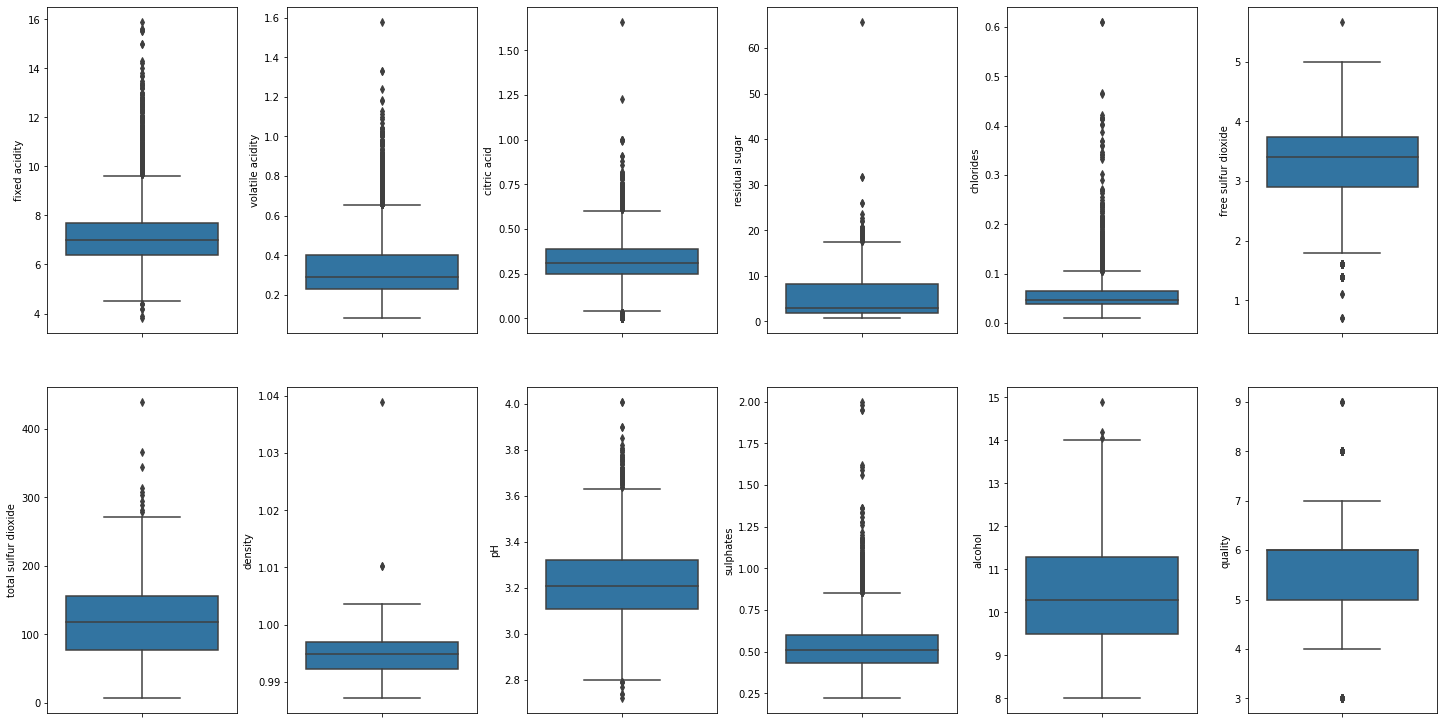

In [168]:
# checking distribution and outlier for each variable
#create box plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in list(df.items())[:-1]:
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [159]:
#we have to remove outliers to increase accuracy of model

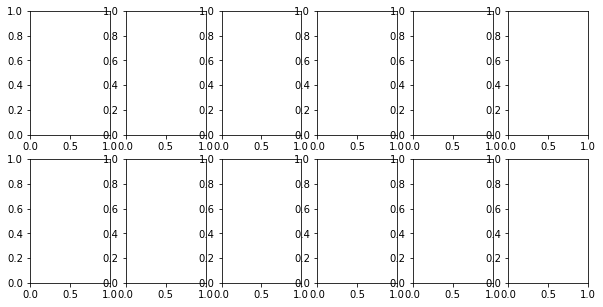

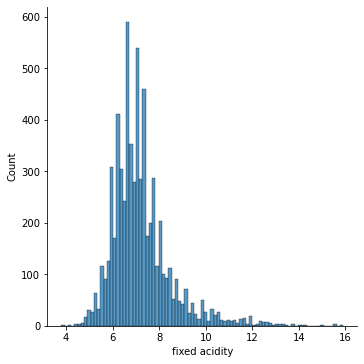

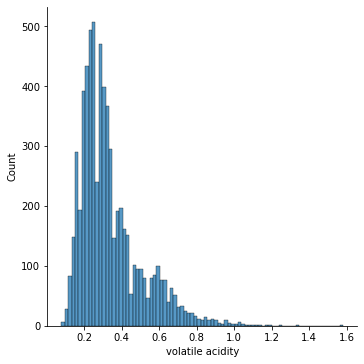

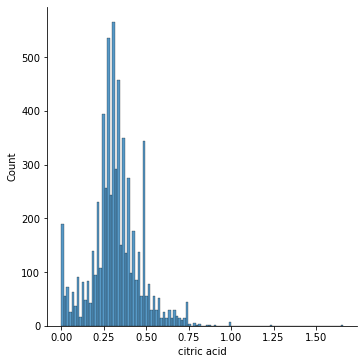

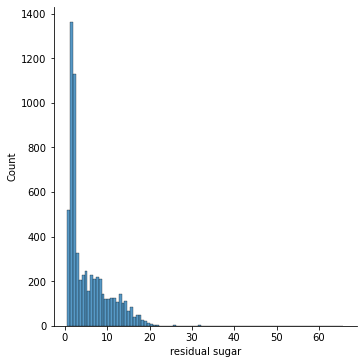

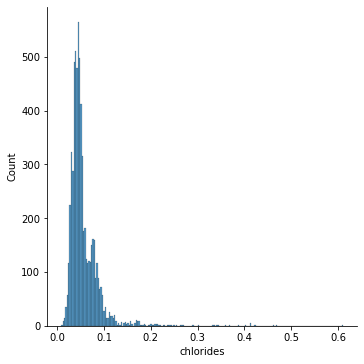

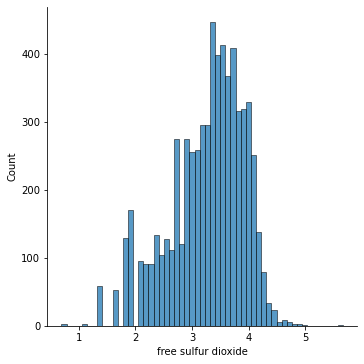

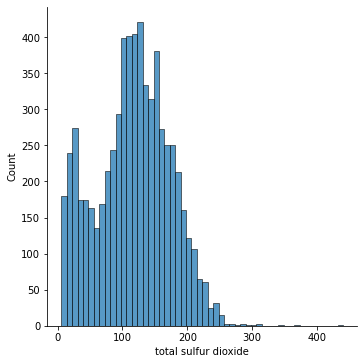

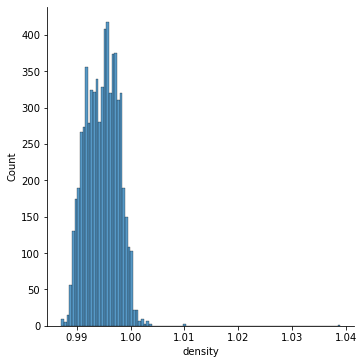

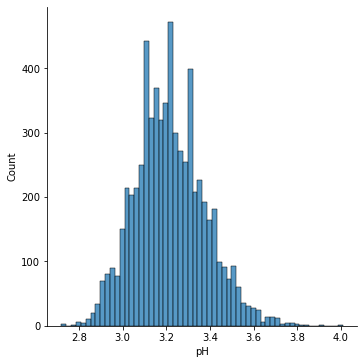

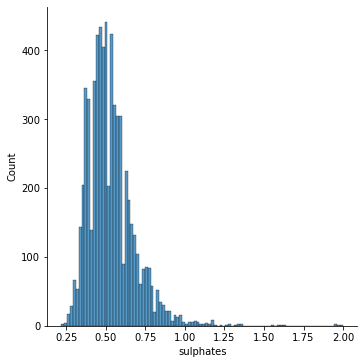

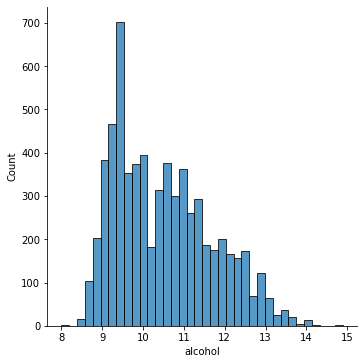

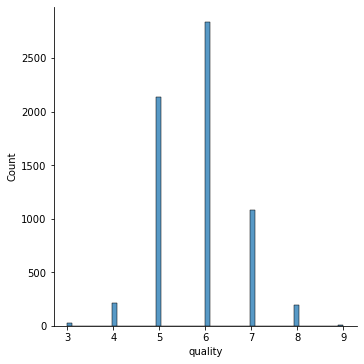

In [169]:
#create displot :disstribution plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(10,5))
index = 0
ax = ax.flatten()

for col, value in list(df.items())[:-1]:
    if col != 'type':
        sns.displot(value, ax=ax[index])
        index += 1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

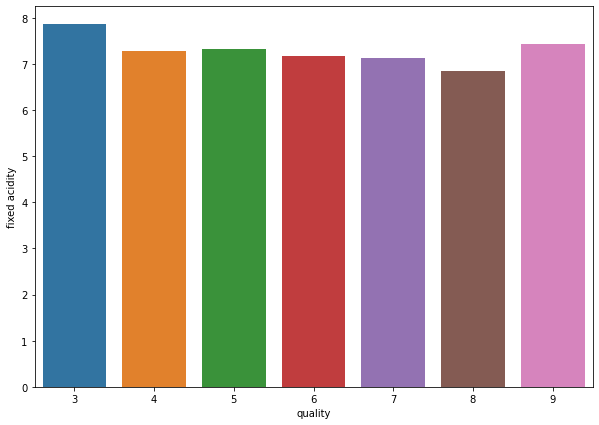

In [170]:
#bivariate analysis to check quality with all the other variables
plt.figure(figsize = (10,7))
sns.barplot(x='quality',y='fixed acidity',data=df , ci = 0)

In [171]:
#Dropping highly correlated varialbes - in this case total sulfur dioxide
wine_new=df.drop('total sulfur dioxide',axis=1)
#log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

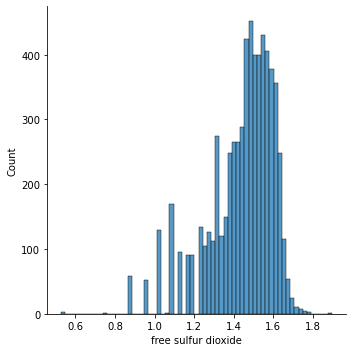

In [172]:
sns.displot(df['free sulfur dioxide'])

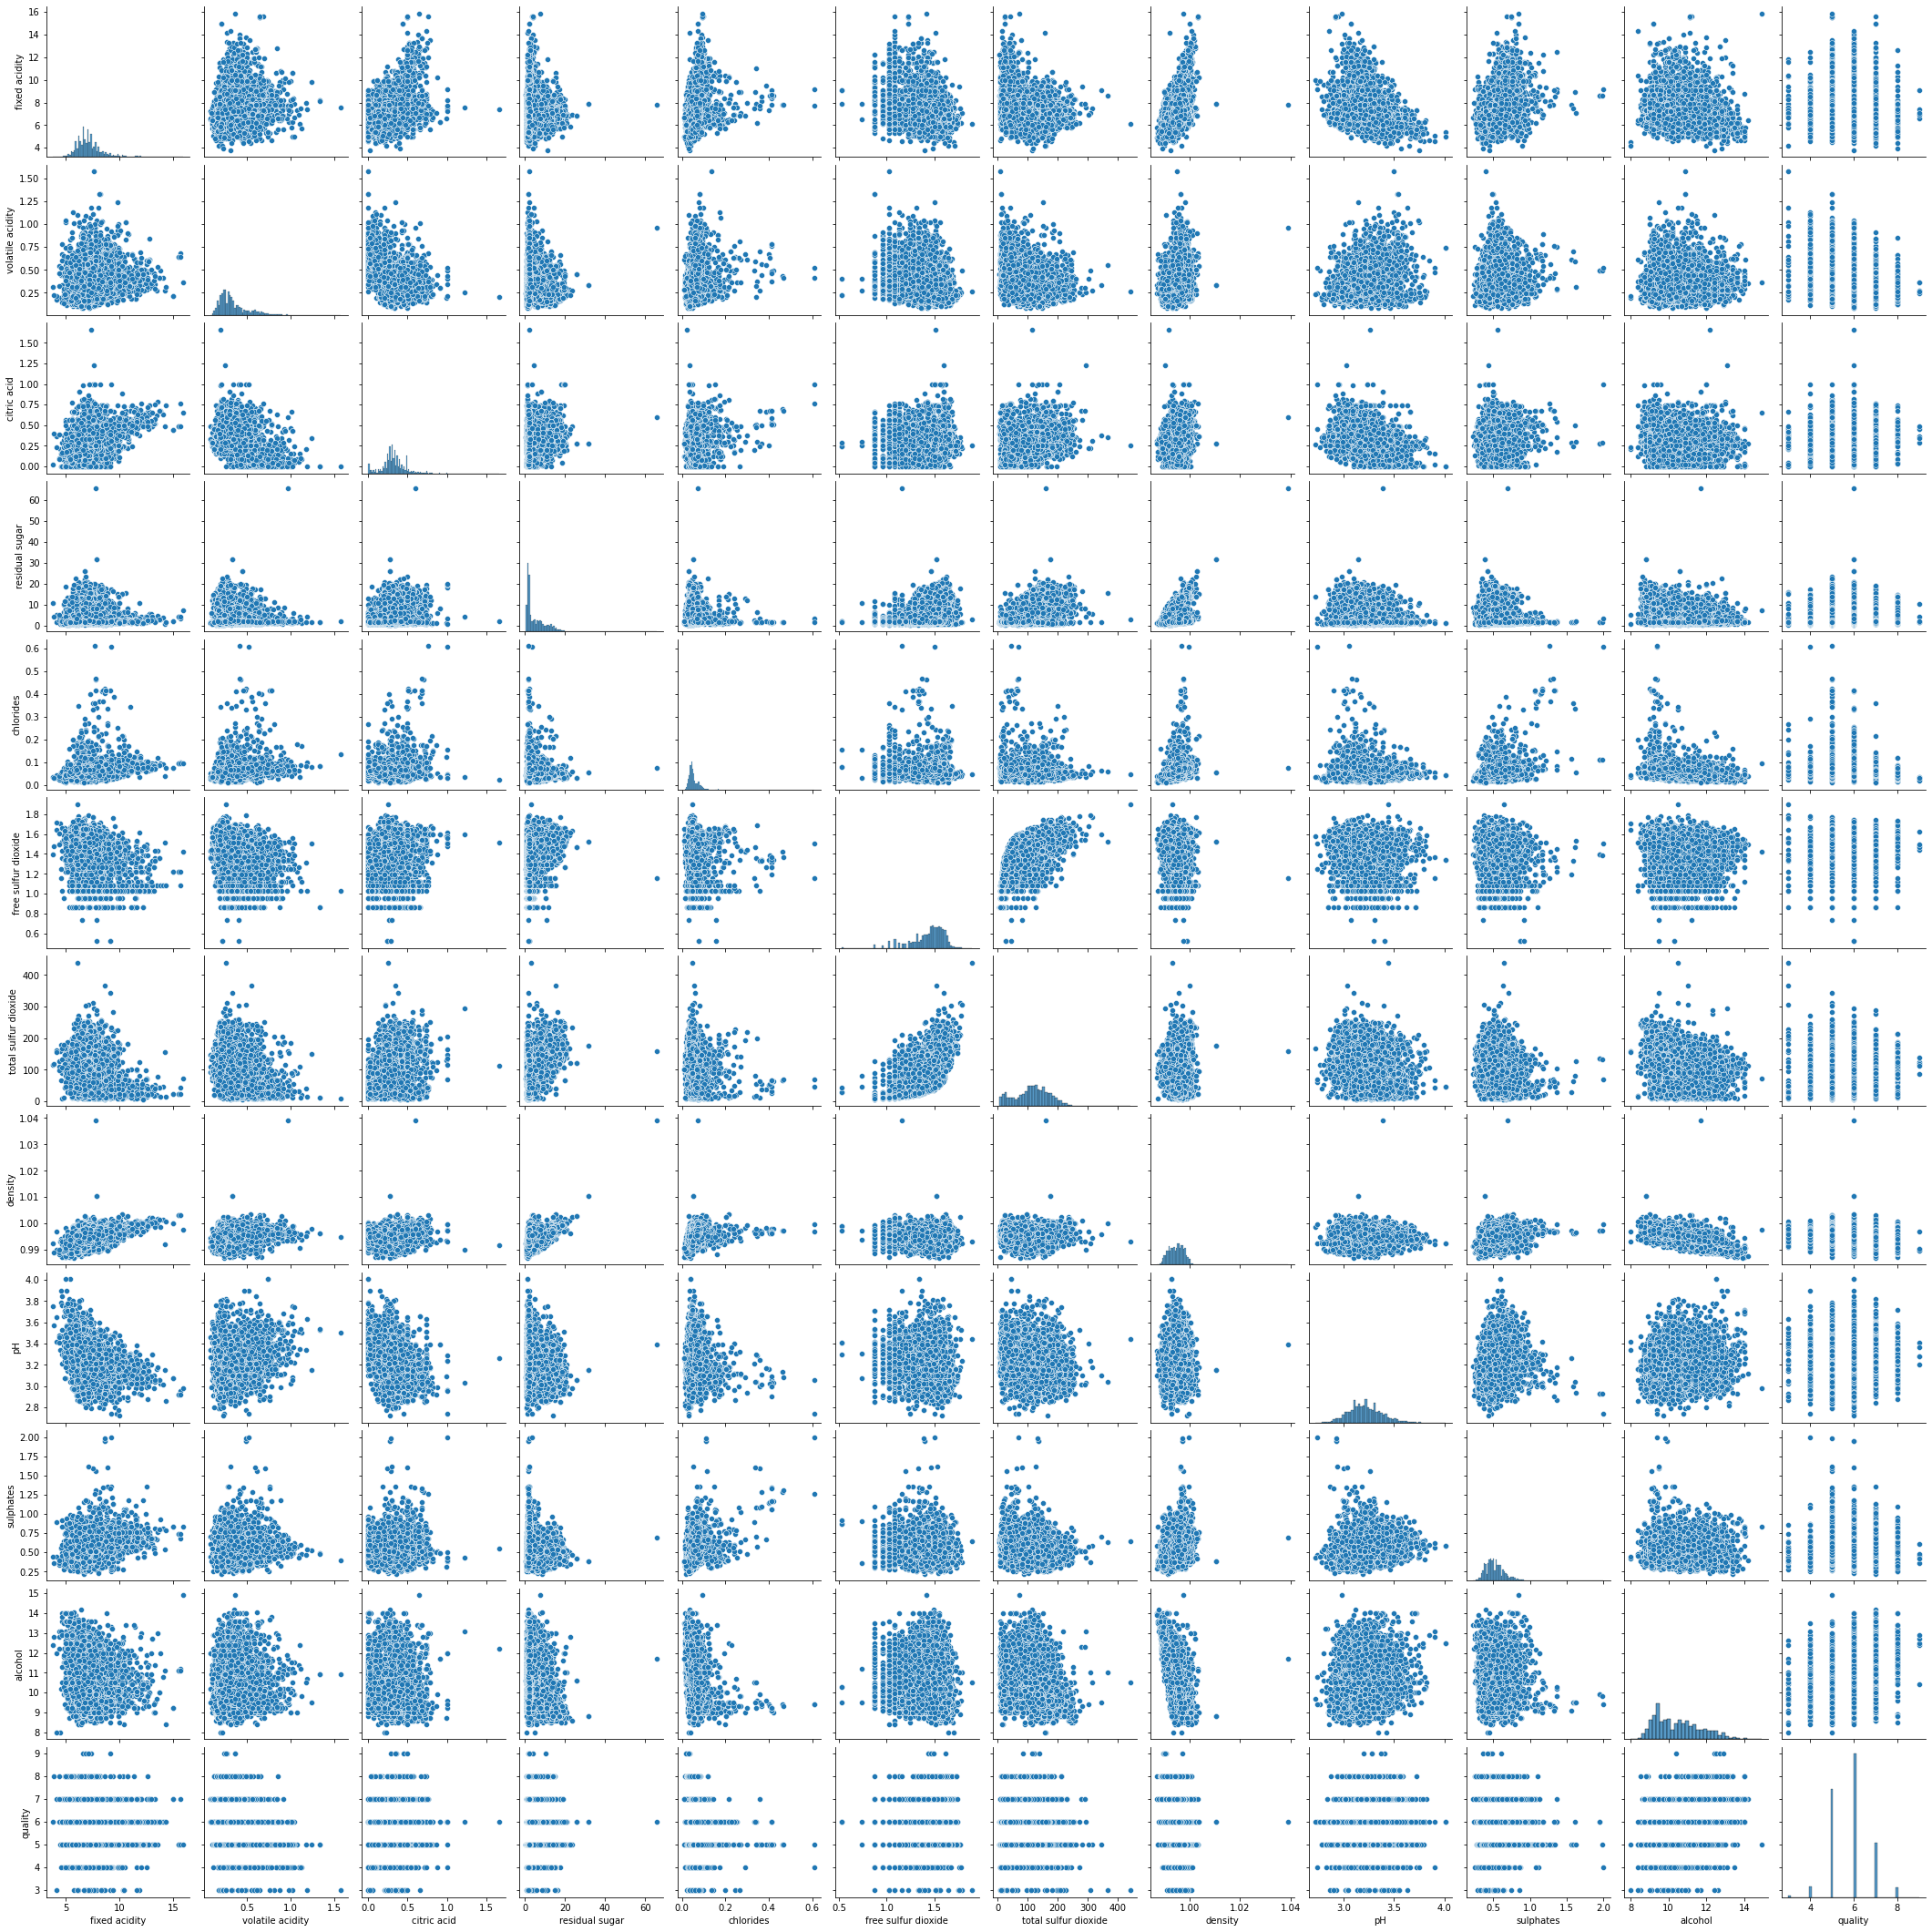

In [173]:
#plotting all the variables for their distibution and relation
sns.pairplot(df)

# Correlation matrix

<AxesSubplot:>

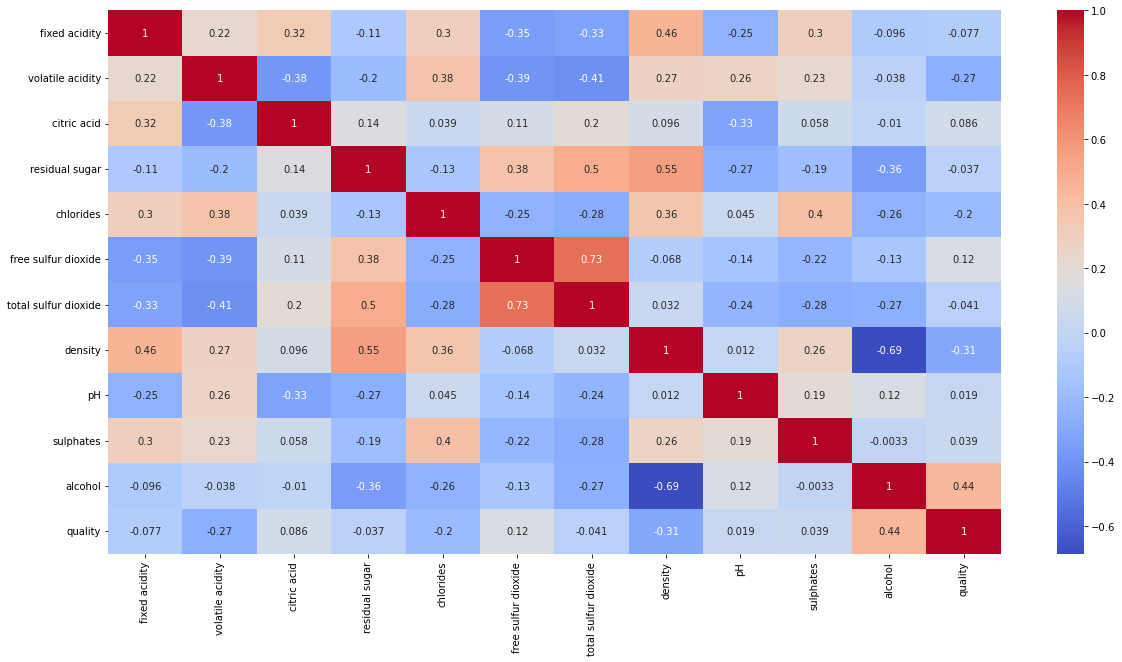

In [174]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='coolwarm')

# Input split

In [188]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.0,0.270,0.36,20.7,0.045,1.574565,170.0,1.00100,3.00,0.450000,8.8,bad
1,6.3,0.300,0.34,1.6,0.049,1.310506,132.0,0.99400,3.30,0.490000,9.5,bad
2,8.1,0.280,0.40,6.9,0.050,1.489299,97.0,0.99510,3.26,0.440000,10.1,bad
3,7.2,0.230,0.32,8.5,0.058,1.583341,186.0,0.99560,3.19,0.400000,9.9,bad
4,7.2,0.230,0.32,8.5,0.058,1.583341,186.0,0.99560,3.19,0.400000,9.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,1.503301,44.0,0.99490,3.45,0.580000,10.5,bad
6493,5.9,0.550,0.10,2.2,0.062,1.545194,51.0,0.99512,3.52,0.531215,11.2,bad
6494,6.3,0.510,0.13,2.3,0.076,1.481877,40.0,0.99574,3.42,0.750000,11.0,bad
6495,5.9,0.645,0.12,2.0,0.075,1.503301,44.0,0.99547,3.57,0.710000,10.2,bad


In [189]:
X = df.drop(columns=['type','quality','goodquality'])
y = df['goodquality']

In [190]:
y.value_counts()

bad     5220
good    1277
Name: goodquality, dtype: int64

In [193]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [194]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [195]:
y.isnull().sum()

0

In [196]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [197]:
#Class Imbalancement: smote
from imblearn.over_sampling import SMOTE,BorderlineSMOTE
oversample = BorderlineSMOTE(k_neighbors=4)
#transform th edataset
X,y = oversample.fit_resample(X,y)

In [198]:
y.value_counts()

bad     5220
good    5220
Name: goodquality, dtype: int64

# Model Training

In [199]:
#classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)
    #train the model
    model.fit(x_train, y_train)
    print('Accuracy', model.score(x_test, y_test) * 100)

    #cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score)*100)

In [200]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)
#train the model
model.fit(x_train, y_train)
print('Accuracy', model.score(x_test, y_test) * 100)

#cross-validation
score = cross_val_score(model, X, y, cv=5)
print('CV Score:', np.mean(score)*100)

# classify(model,x, y)

Accuracy 74.52107279693486
CV Score: 71.89655172413794


In [201]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)
#train the model
model.fit(x_train, y_train)
print('Accuracy', model.score(x_test, y_test) * 100)

#cross-validation
score = cross_val_score(model, X, y, cv=5)
print('CV Score:', np.mean(score)*100)

#classify(model, x, y)

Accuracy 87.16475095785441
CV Score: 78.84099616858238


In [202]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)
#train the model
model.fit(x_train, y_train)
print('Accuracy', model.score(x_test, y_test) * 100)

#cross-validation
score = cross_val_score(model, X, y, cv=5)
print('CV Score:', np.mean(score)*100)
#classify(model,x, y)

Accuracy 91.72413793103448
CV Score: 85.3735632183908


In [228]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)
#train the model
model.fit(x_train, y_train)
print('Accuracy', model.score(x_test, y_test) * 100)
#cross-validation
score = cross_val_score(model, X, y, cv=5)
print('CV Score:', np.mean(score)*100)
#classify(model, x, y)

Accuracy 91.99233716475096
CV Score: 86.28352490421456


In [231]:
# !pip install streamlit

# saving model in pickel

In [232]:
import pickle

In [233]:
#file = open('model.pkl','w')
#file

In [234]:
#model = ...

In [235]:
with open('model.pkl', 'wb') as file:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    pickle.dump(model, file)

In [236]:
import os
file_path = 'model.pkl'

if os.path.exists(file_path):
    print("File saved successfully.")
else:
    print("File was not saved.")

File saved successfully.


In [237]:
# model = open('model.pkl','r')
import pandas 
model=pandas.read_pickle('model.pkl')
model.predict([[1,2,2,3,3,4,5,6,6,1,2]])

array(['bad'], dtype=object)